# Advanced Data Preparation with Python (Car Data)

## Libraries and settings

In [1]:
# Libraries
import os
import re
import time
import fnmatch
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Get current working directory
print(os.getcwd())

/workspaces/python_data_preparation


## Importing data

In [10]:
# Import data from csv to pandas dataframe named 'df'
df = pd.read_csv('./Data/customer_segmentation.csv', sep=",", encoding='ISO-8859-1')

# Change the column names to lowercase
df.columns = df.columns.str.lower()

# Display the first 5 rows of the dataframe
df.head()


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Count number of rows and columns in the data frame

In [12]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])


Number of rows:  541909
Number of columns:  8


## Get data types (raw-format from web scraper)

In [13]:
# Get data types of each column
# Get data types of each column
df.dtypes


invoiceno       object
stockcode       object
description     object
quantity         int64
invoicedate     object
unitprice      float64
customerid     float64
country         object
dtype: object

## Extract information from raw data using regular expressions (regex)

### Get data types of all variables, including the new once

## Count and remove missing values

In [14]:
# Count and remove missing values
print("Missing values before removing: ", df.isnull().sum().sum())
df = df.dropna()
print("Missing values after removing: ", df.isnull().sum().sum())

# Reset the index of the dataframe
df = df.reset_index(drop=True)


Missing values before removing:  136534
Missing values after removing:  0


## Count and remove duplicated values

In [15]:
# Count and remove duplicates
print("Number of duplicates before removing: ", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of duplicates after removing: ", df.duplicated().sum())

# Reset the index of the dataframe
df = df.reset_index(drop=True)


Number of duplicates before removing:  5225
Number of duplicates after removing:  0


## Use string manipulation methods to create additional variables from the car type

### Change strings in 'type' to uppercase

In [16]:
# Change strings in 'type' to uppercase and remove leading and trailing whitespaces
df['description'] = df['description'].str.upper().str.strip()

# Display variable 'type'
df['description'].head()


0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
Name: description, dtype: object

### Calculate length of strings in 'type'

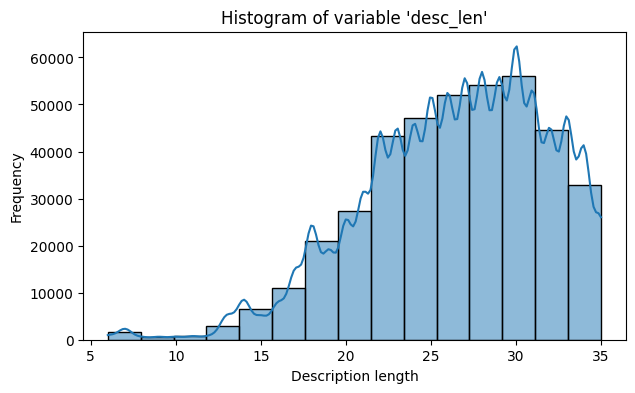

In [19]:
# Calculate new variable 'type_len' with length of strings in 'type', use .appy()
df['desc_len'] = df['description'].apply(len)


# Display variables 'type' and 'type_len'
df[['description', 'desc_len']].head()

# Plot histogram of variable 'type_len'
plt.figure(figsize=(7, 4))
sns.histplot(df['desc_len'], bins=15, kde=True)
plt.title("Histogram of variable 'desc_len'")
plt.xlabel('Description length')
plt.ylabel('Frequency')
plt.show()


### Create binary (0/1) variable 'luxury_car'

In [20]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,desc_len
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,34
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,19
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,30
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,30


In [22]:
# Create a pattern which can be used to search the variable 'type'
pattern = 'WHITE|RED|YELLOW|GREEN'

# Create new variable 'luxury_car' as binary dummy (0/1) variable
df['colourful_product'] = df['description'].str.contains(pat = pattern).astype(int)
print(df['colourful_product'].sum())

# Show values
df[['description','colourful_product',]].loc[df['colourful_product'] == 1]

58215


,description,colourful_product
0,WHITE HANGING HEART T-LIGHT HOLDER,1
1,WHITE METAL LANTERN,1
4,RED WOOLLY HOTTIE WHITE HEART.,1
8,HAND WARMER RED POLKA DOT,1
22,RED COAT RACK PARIS FASHION,1
...,...,...
401577,SET 12 RETRO WHITE CHALK STICKS,1
401587,RED RETROSPOT ROUND CAKE TINS,1
401588,DOORMAT RED RETROSPOT,1
401593,ALARM CLOCK BAKELIKE RED,1


### Create variable 'total price'

In [37]:
df['total_price'] = df['unitprice'] * df['quantity']
df.head()
df.dtypes


invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate            object
unitprice             float64
customerid            float64
country                object
desc_len                int64
colourful_product       int64
total_price           float64
timestamp              object
total_price_bin      category
dtype: object

### Include current datetime as time stamp

In [26]:
# Include current datetime as time stamp in the format 'YYYY-MM-DD HH:MM:SS'
df['timestamp'] = datetime.now().strftime('%Y-%m-%d %H:%M:%S')


## Discretization of numerical data

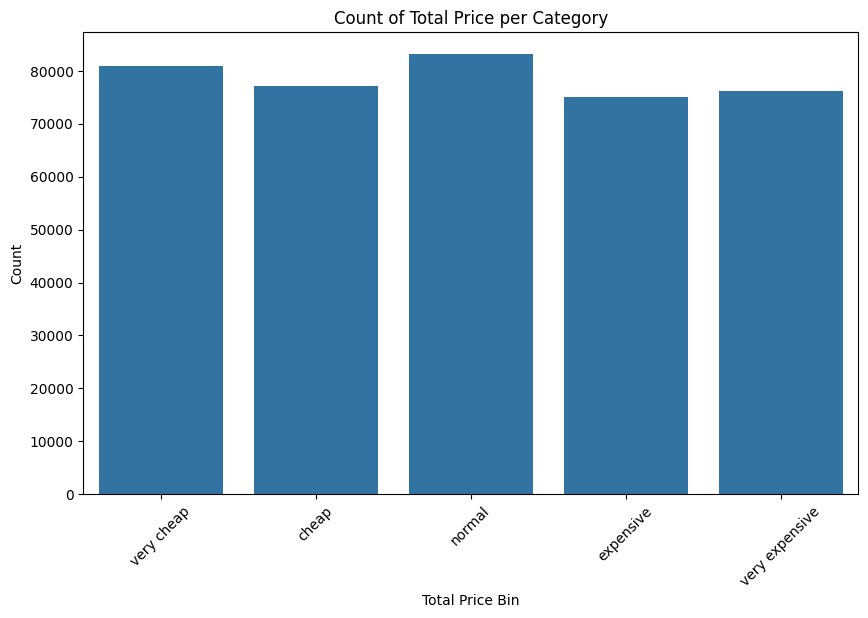

In [40]:
# Discretization of the variable 'price_per_hp' into 5 bins (note the 'qcut' function)
cols = ['total_price']
df[cols] = df[df[cols] > 0][cols]
df.dropna()

df['total_price_bin'] = pd.qcut(df['total_price'], 
                                 q=5,  # number of quantiles
                                 labels=['very cheap', 
                                         'cheap', 
                                         'normal', 
                                         'expensive', 
                                         'very expensive'])
                                        

import matplotlib.pyplot as plt
import seaborn as sns

# Count distribution per price category
plt.figure(figsize=(10, 6))
sns.countplot(x='total_price_bin', data=df)
plt.title("Count of Total Price per Category")
plt.xlabel("Total Price Bin")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()




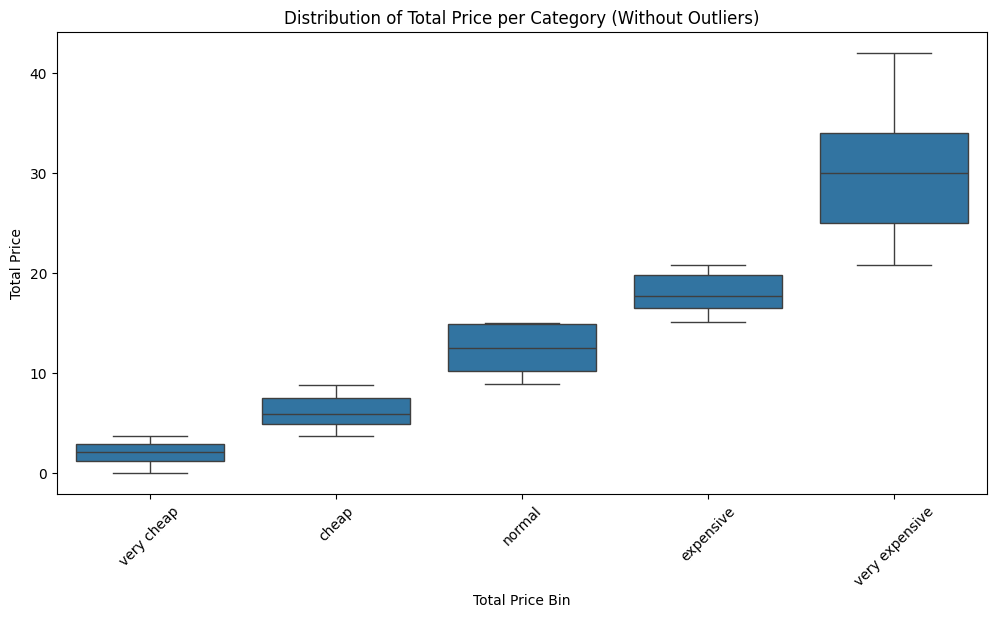

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1 and Q3 for total_price
Q1 = df['total_price'].quantile(0.25)
Q3 = df['total_price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outlier data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to exclude outliers
filtered_df = df[(df['total_price'] >= lower_bound) & (df['total_price'] <= upper_bound)]

# Box plot without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='total_price_bin', y='total_price', data=filtered_df)
plt.title("Distribution of Total Price per Category (Without Outliers)")
plt.xlabel("Total Price Bin")
plt.ylabel("Total Price")
plt.xticks(rotation=45)
plt.show()


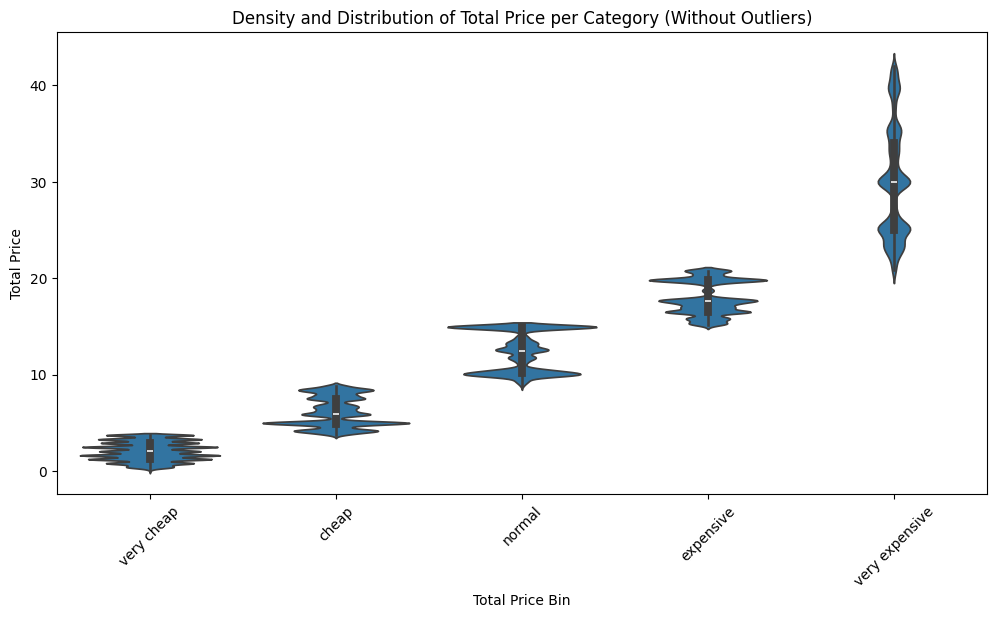

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Q1 and Q3 for total_price
Q1 = df['total_price'].quantile(0.25)
Q3 = df['total_price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outlier data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to exclude outliers
filtered_df = df[(df['total_price'] >= lower_bound) & (df['total_price'] <= upper_bound)]

# Violin plot without outliers
plt.figure(figsize=(12, 6))
sns.violinplot(x='total_price_bin', y='total_price', data=filtered_df)
plt.title("Density and Distribution of Total Price per Category (Without Outliers)")
plt.xlabel("Total Price Bin")
plt.ylabel("Total Price")
plt.xticks(rotation=45)
plt.show()


## One Hot Encoding

In [45]:
# One Hot Encoding of the variable 'price_per_m2_cat'
try:
    df = pd.get_dummies(df, 
                        columns=['total_price_bin'], 
                        drop_first=False)
except:
    print("Dummy variables already exist")

# Convert boolean values to integers (0 and 1)
df[df.filter(like='total_price_bin').columns] = df.filter(like='total_price_bin').astype(int)

# Show values of the new dummy variables
df.filter(like='total_price_bin').head()


,total_price_bin_very cheap,total_price_bin_cheap,total_price_bin_normal,total_price_bin_expensive,total_price_bin_very expensive
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0


## Scaling

### Min-Max Scaling

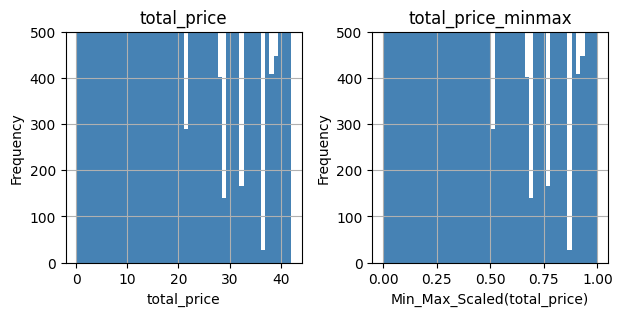

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,desc_len,colourful_product,total_price,timestamp,total_price_bin_very cheap,total_price_bin_cheap,total_price_bin_normal,total_price_bin_expensive,total_price_bin_very expensive,total_price_minmax
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,34,1,15.30,2024-11-10 09:33:42,0,0,0,1,0,0.000091
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,19,1,20.34,2024-11-10 09:33:42,0,0,0,1,0,0.000121
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,30,0,22.00,2024-11-10 09:33:42,0,0,0,0,1,0.000131
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,35,0,20.34,2024-11-10 09:33:42,0,0,0,1,0,0.000121
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,30,1,20.34,2024-11-10 09:33:42,0,0,0,1,0,0.000121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,27,0,10.20,2024-11-10 09:33:42,0,0,1,0,0,0.000061
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,27,0,12.60,2024-11-10 09:33:42,0,0,1,0,0,0.000075
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,28,0,16.60,2024-11-10 09:33:42,0,0,0,1,0,0.000099
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,31,0,16.60,2024-11-10 09:33:42,0,0,0,1,0,0.000099


In [49]:
# Min-Max scaling of the variable 'mileage'
filtered_df['total_price_minmax'] = (filtered_df['total_price'] - filtered_df['total_price'].min()) / (filtered_df['total_price'].max() - filtered_df['total_price'].min())

# Histogram of the variable 'area' and 'area_scaled'
ax = filtered_df[['total_price', 'total_price_minmax']].hist(bins=50, 
                                      figsize=(7, 3), 
                                      color='steelblue')
                                      
# Set the y-axis range for each subplot and add labels
for axis, label in zip(ax.flatten(), ['total_price', 'Min_Max_Scaled(total_price)']):
    axis.set_ylim(0, 500)
    axis.set_xlabel(label)
    axis.set_ylabel('Frequency')

# Display the plot
plt.show()

df

### Max-Absolute Scaling

### Robust Scaling

## Standardization

### Z-score Normalization

## Transformation

### Log-Transformation

### SQRT-Transformation

### Box-Cox Transformation

## Combining & organizing data

### Reading car data with geocoded addresses

### Join geo-information to car data using .merge()

### Reading municipality-level data from an .xlsx - file

### Join municipality-level data to the car data data using .merge()

### Sorting data

### Reshaping data

#### Reshaping data using .stack() and .unstack()

#### Reshaping data using .melt()

### Pivoting data using .pivot_table()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')